In [2]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
# Why pad sequences? 
# when working with sequences of varying length (like un-normalized text data) you must constrain them to the same size

In [3]:
# using an embedding layer and classifier on the imdb data (pg 187)
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential() 
model.add(Embedding(10000, 8, input_length=maxlen))
# word embedding is an alternative to one hot encoding of text data (more densly stored)

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 141us/step - loss: 0.6759 - acc: 0.6046 - val_loss: 0.6399 - val_acc: 0.6804
Epoch 2/10
20000/20000 [==============================] - 3s 135us/step - loss: 0.5658 - acc: 0.7426 - val_loss: 0.5468 - val_acc: 0.7204
Epoch 3/10
20000/20000 [==============================] - 3s 149us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 2s 117us/step - loss: 0.4264 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7456
Epoch 5/10
20000/20000 [==============================] - 3s 155us/step - loss: 0.3931 - acc: 0.8256 - val_loss: 0.4981 - val_acc: 0.7536
Epoch 6/10
20000/20000 [==============================] - 3s 136us/step - loss: 0.3669 - acc: 0.8396 - val_loss: 0.5013 - val_acc: 0.7536
Epoch 7/10
20000/20000 [==============================] - 3s 143us/step - loss: 0.3436 - acc: 0.8534 - val_loss: 0.5051 - v

Does pretty well considering it's only looking at the first 20 words and sense we are flattening and then feeding into a dense layer it is considering only each individual word on it's own not inter-word relationships. it's much better to add recurrent layers or 1D convolutional lares on top of the embedding sequences to learn features that take into account each sequence as a whole. 

In [5]:
from keras.preprocessing import sequence 

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), ' train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape', input_train.shape)
print('input_test shape', input_test.shape)

Loading data...
25000  train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape (25000, 500)
input_test shape (25000, 500)


In [6]:
from keras.layers import Dense, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.5752 - acc: 0.6754 - val_loss: 0.4138 - val_acc: 0.8212
Epoch 2/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.3662 - acc: 0.8495 - val_loss: 0.3705 - val_acc: 0.8464
Epoch 3/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.2947 - acc: 0.8818 - val_loss: 0.3588 - val_acc: 0.8440
Epoch 4/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.2343 - acc: 0.9109 - val_loss: 0.3318 - val_acc: 0.8718
Epoch 5/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.2018 - acc: 0.9248 - val_loss: 0.3806 - val_acc: 0.8366
Epoch 6/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1693 - acc: 0.9374 - val_loss: 0.3519 - val_acc: 0.8790
Epoch 7/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1551 - acc: 0.9418 - val_loss: 0.4188 - val_acc:

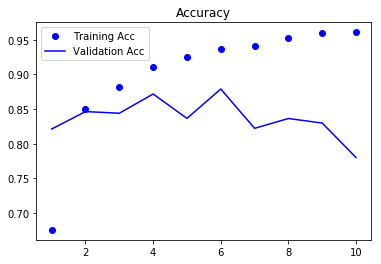

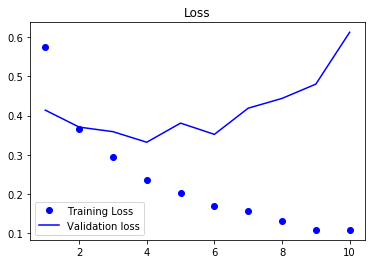

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss')
plt.legend()

plt.show()

In [ ]:
from keras.layers import LSTM 


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(input_train, y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 8704/20000 [============>.................] - ETA: 3:02 - loss: 0.5159 - acc: 0.7428

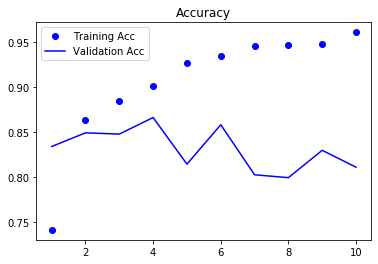

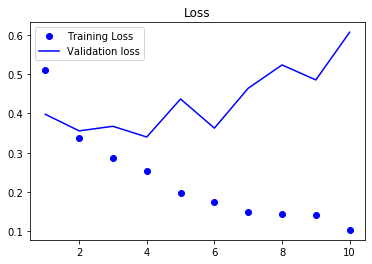

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss')
plt.legend()

plt.show()